<a href="https://colab.research.google.com/github/kikidatalabs/kiki_1/blob/main/20241220_IKEA_app_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab 환경에서 구글 앱 스토어와 애플 앱 스토어 리뷰 크롤링 및 감성 분석 코드

## 1. 필요한 라이브러리 설치 및 로드
# 라이브러리가 설치되지 않은 경우 설치하도록 수정
import os
import subprocess

def install(package):
    subprocess.check_call(["python3", "-m", "pip", "install", package])

try:
    from google_play_scraper import Sort, reviews
except ImportError:
    print("google-play-scraper not found. Installing...")
    install("google-play-scraper")
    from google_play_scraper import Sort, reviews

try:
    from app_store_scraper import AppStore
except ImportError:
    print("app-store-scraper not found. Installing...")
    install("app-store-scraper")
    from app_store_scraper import AppStore

try:
    from transformers import pipeline
except ImportError:
    print("transformers not found. Installing...")
    install("transformers")
    from transformers import pipeline

import pandas as pd

# 감성 분석 모델 로드
sentiment_analyzer = pipeline("sentiment-analysis")

## 2. 구글 앱 스토어 리뷰 크롤링
def fetch_google_reviews(app_id, lang='en', country='us', num_reviews=100):
    google_reviews = reviews(
        app_id,
        lang=lang,
        country=country,
        sort=Sort.MOST_RELEVANT,
        count=num_reviews
    )
    df_google = pd.DataFrame([{
        "review": review["content"],
        "score": review["score"]
    } for review in google_reviews[0]])
    return df_google

## 3. 애플 앱 스토어 리뷰 크롤링
def fetch_apple_reviews(app_name, country='us', num_reviews=100):
    app = AppStore(country=country, app_name=app_name)
    app.review(how_many=num_reviews)
    df_apple = pd.DataFrame([{
        "review": review["review"],
        "score": review["rating"]
    } for review in app.reviews])
    return df_apple

## 4. 감성 분석 수행
def perform_sentiment_analysis(df):
    df['sentiment'] = df['review'].apply(lambda x: sentiment_analyzer(x)[0]['label'])
    return df

## 5. 실행
if __name__ == "__main__":
    # IKEA 앱의 앱 ID 및 이름 설정
    google_app_id = "com.ingka.ikea.app"  # 구글 앱 스토어 ID
    apple_app_name = "ikea"  # 애플 앱 스토어 이름

    try:
        # 구글 리뷰 가져오기
        print("Fetching Google Play Store reviews...")
        google_reviews = fetch_google_reviews(google_app_id, lang='en', country='us', num_reviews=100)
        print("Google reviews fetched.")

        # 애플 리뷰 가져오기
        print("Fetching Apple App Store reviews...")
        apple_reviews = fetch_apple_reviews(apple_app_name, country='us', num_reviews=100)
        print("Apple reviews fetched.")

        # 감성 분석
        print("Performing sentiment analysis...")
        google_reviews = perform_sentiment_analysis(google_reviews)
        apple_reviews = perform_sentiment_analysis(apple_reviews)

        # 데이터 저장
        print("Saving reviews to CSV files...")
        google_reviews.to_csv("google_reviews.csv", index=False)
        apple_reviews.to_csv("apple_reviews.csv", index=False)

        print("All tasks completed. Review data saved.")
    except Exception as e:
        print(f"An error occurred: {e}")


google-play-scraper not found. Installing...
app-store-scraper not found. Installing...


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Fetching Google Play Store reviews...
Google reviews fetched.
Fetching Apple App Store reviews...
Apple reviews fetched.
Performing sentiment analysis...
Saving reviews to CSV files...
All tasks completed. Review data saved.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# Colab 환경에서 구글 앱 스토어와 애플 앱 스토어 리뷰 크롤링 및 감성 분석 코드

## 1. 필요한 라이브러리 설치 및 로드
# 라이브러리가 설치되지 않은 경우 설치하도록 수정
import os
import subprocess

# 설치 함수 정의
def install(package):
    subprocess.check_call(["python3", "-m", "pip", "install", package])

# 라이브러리 로드 및 설치
try:
    from google_play_scraper import Sort, reviews
except ImportError:
    print("google-play-scraper not found. Installing...")
    install("google-play-scraper")
    from google_play_scraper import Sort, reviews

try:
    from app_store_scraper import AppStore
except ImportError:
    print("app-store-scraper not found. Installing...")
    install("app-store-scraper")
    from app_store_scraper import AppStore

try:
    from transformers import pipeline
except ImportError:
    print("transformers not found. Installing...")
    install("transformers")
    from transformers import pipeline

import pandas as pd

# 감성 분석 모델 로드
sentiment_analyzer = pipeline("sentiment-analysis")

## 2. 구글 앱 스토어 리뷰 크롤링
def fetch_google_reviews(app_id, lang='en', country='us', num_reviews=100):
    google_reviews = reviews(
        app_id,
        lang=lang,
        country=country,
        sort=Sort.MOST_RELEVANT,
        count=num_reviews
    )
    df_google = pd.DataFrame([{
        "review": review["content"],
        "score": review["score"]
    } for review in google_reviews[0]])
    return df_google

## 3. 애플 앱 스토어 리뷰 크롤링
def fetch_apple_reviews(app_name, country='us', num_reviews=100):
    app = AppStore(country=country, app_name=app_name)
    app.review(how_many=num_reviews)
    df_apple = pd.DataFrame([{
        "review": review["review"],
        "score": review["rating"]
    } for review in app.reviews])
    return df_apple

## 4. 감성 분석 수행
def perform_sentiment_analysis(df):
    df['sentiment'] = df['review'].apply(lambda x: sentiment_analyzer(x)[0]['label'])
    return df

## 5. 실행 및 데이터 저장 경로 안내
if __name__ == "__main__":
    # IKEA 앱의 앱 ID 및 이름 설정
    google_app_id = "com.ingka.ikea.app"  # 구글 앱 스토어 ID
    apple_app_name = "ikea"  # 애플 앱 스토어 이름

    try:
        # 구글 리뷰 가져오기
        print("Fetching Google Play Store reviews...")
        google_reviews = fetch_google_reviews(google_app_id, lang='en', country='us', num_reviews=100)
        print("Google reviews fetched.")

        # 애플 리뷰 가져오기
        print("Fetching Apple App Store reviews...")
        apple_reviews = fetch_apple_reviews(apple_app_name, country='us', num_reviews=100)
        print("Apple reviews fetched.")

        # 감성 분석
        print("Performing sentiment analysis...")
        google_reviews = perform_sentiment_analysis(google_reviews)
        apple_reviews = perform_sentiment_analysis(apple_reviews)

        # 데이터 저장
        output_dir = os.getcwd()
        google_path = os.path.join(output_dir, "google_reviews.csv")
        apple_path = os.path.join(output_dir, "apple_reviews.csv")

        print(f"Saving reviews to CSV files at: {output_dir}")
        google_reviews.to_csv(google_path, index=False)
        apple_reviews.to_csv(apple_path, index=False)

        print(f"All tasks completed. Files saved:\nGoogle Reviews: {google_path}\nApple Reviews: {apple_path}")
    except Exception as e:
        print(f"An error occurred: {e}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Fetching Google Play Store reviews...
Google reviews fetched.
Fetching Apple App Store reviews...
Apple reviews fetched.
Performing sentiment analysis...
Saving reviews to CSV files at: /content
All tasks completed. Files saved:
Google Reviews: /content/google_reviews.csv
Apple Reviews: /content/apple_reviews.csv


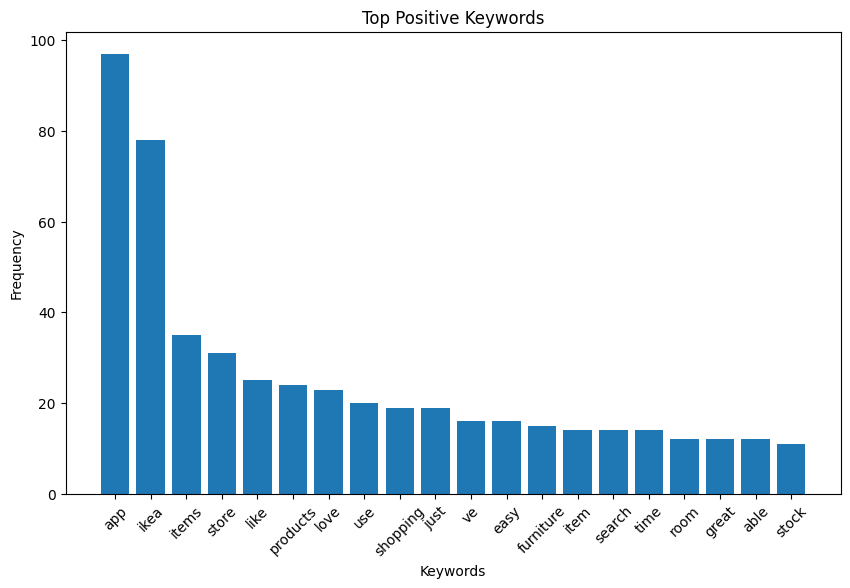

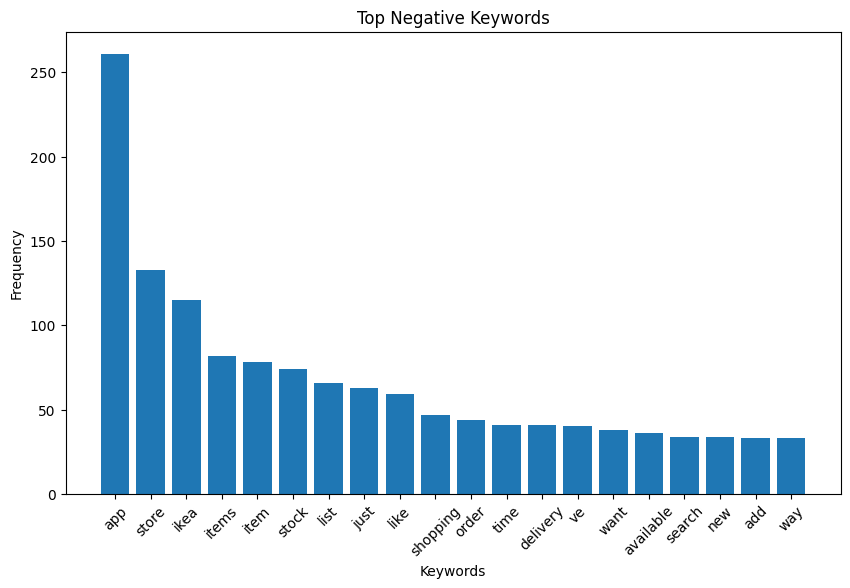

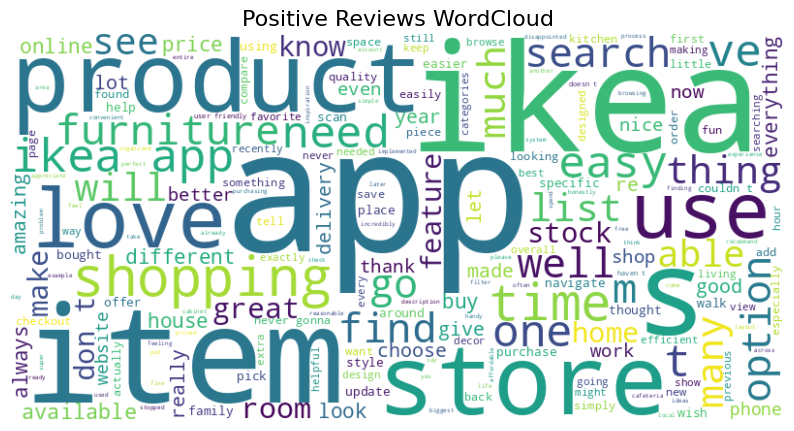

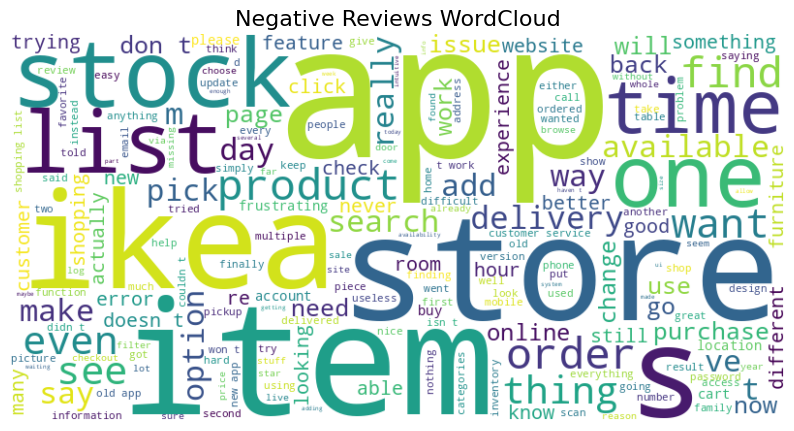

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 파일 읽기
google_reviews = pd.read_csv("google_reviews.csv")
apple_reviews = pd.read_csv("apple_reviews.csv")

# 데이터 결합
data = pd.concat([google_reviews, apple_reviews], ignore_index=True)

# 긍정과 부정 리뷰 분리
positive_reviews = data[data['sentiment'] == 'POSITIVE']['review']
negative_reviews = data[data['sentiment'] == 'NEGATIVE']['review']

# 텍스트 전처리 함수
def preprocess_text(text_series):
    return text_series.str.lower().str.replace(r"[^\w\s]", " ", regex=True)

positive_reviews = preprocess_text(positive_reviews)
negative_reviews = preprocess_text(negative_reviews)

# 키워드 추출 함수
def extract_keywords(reviews, top_n=20):
    vectorizer = CountVectorizer(stop_words='english', max_features=top_n)
    X = vectorizer.fit_transform(reviews.dropna())
    keywords = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)
    return pd.DataFrame({'keyword': keywords, 'count': counts}).sort_values(by='count', ascending=False)

# 긍정과 부정 키워드 추출
positive_keywords = extract_keywords(positive_reviews)
negative_keywords = extract_keywords(negative_reviews)

# 키워드 시각화 함수
def plot_keywords(keyword_df, title):
    plt.figure(figsize=(10, 6))
    plt.bar(keyword_df['keyword'], keyword_df['count'])
    plt.title(title)
    plt.xlabel('Keywords')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# 긍정 리뷰 키워드 시각화
plot_keywords(positive_keywords, "Top Positive Keywords")

# 부정 리뷰 키워드 시각화
plot_keywords(negative_keywords, "Top Negative Keywords")

# 워드클라우드 생성 함수
def create_wordcloud(text_series, title):
    text = " ".join(text_series.dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# 긍정 리뷰 워드클라우드
create_wordcloud(positive_reviews, "Positive Reviews WordCloud")

# 부정 리뷰 워드클라우드
create_wordcloud(negative_reviews, "Negative Reviews WordCloud")


Average Positive Review Length: 455.3703703703704
Average Negative Review Length: 564.2328767123288
Negative Review Issues by Category:
       Category  Count
0       search     61
3     checkout     54
2  performance     28
1   navigation     21


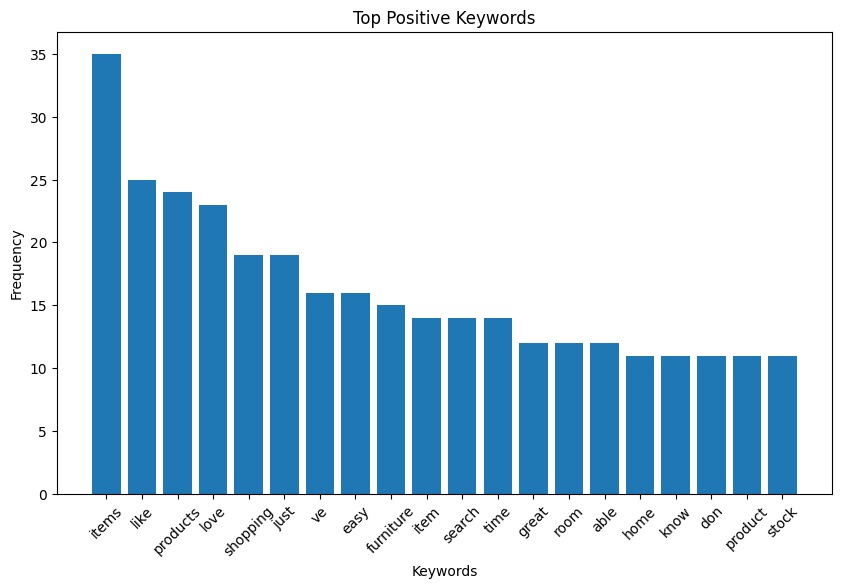

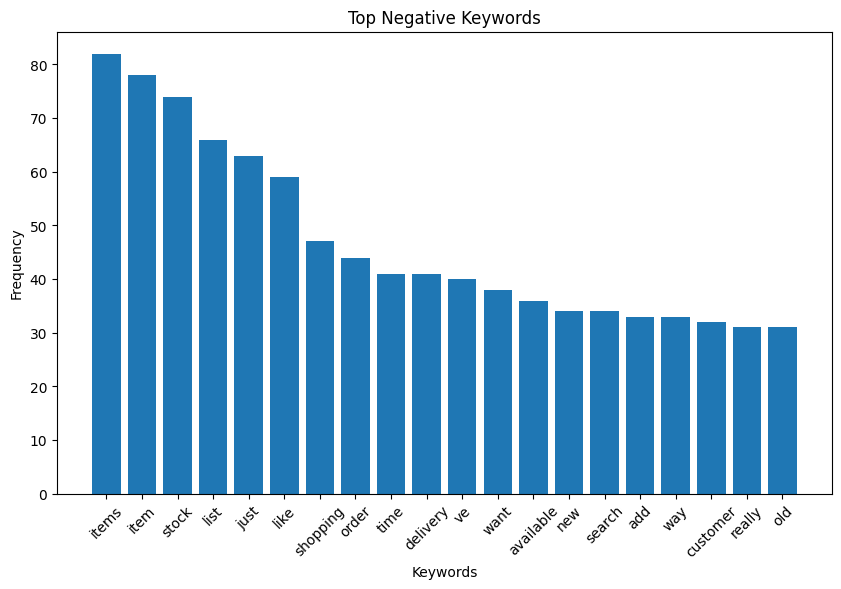

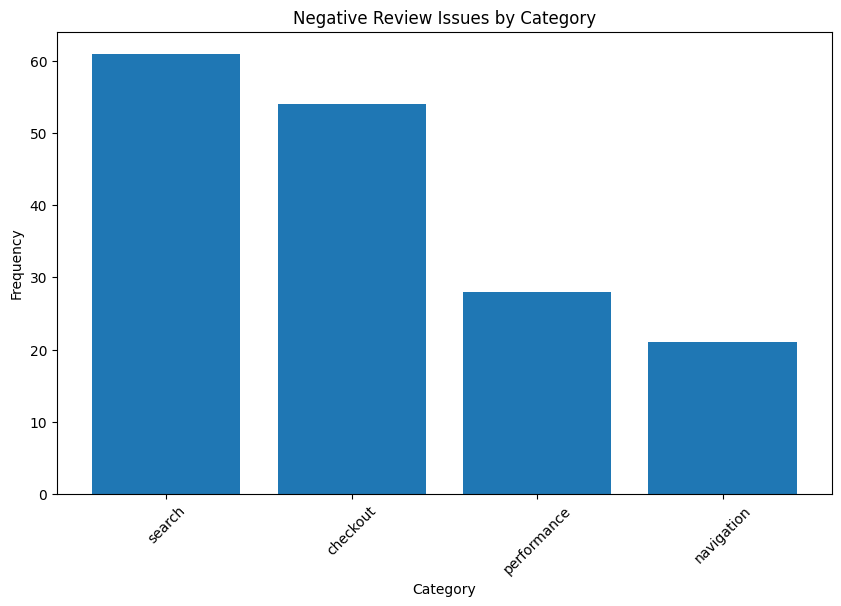

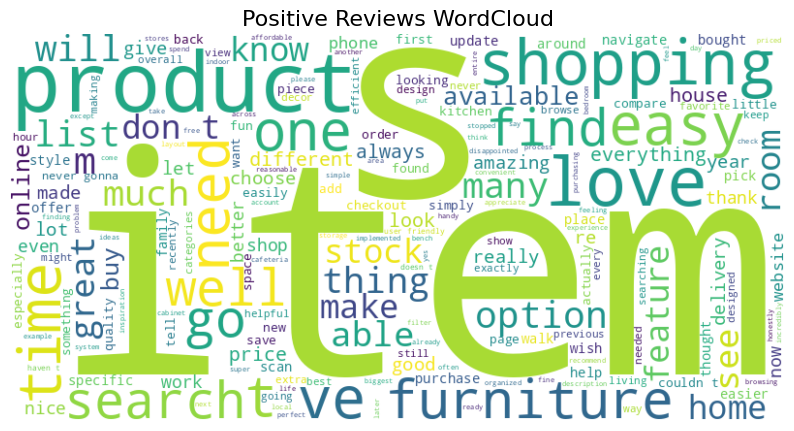

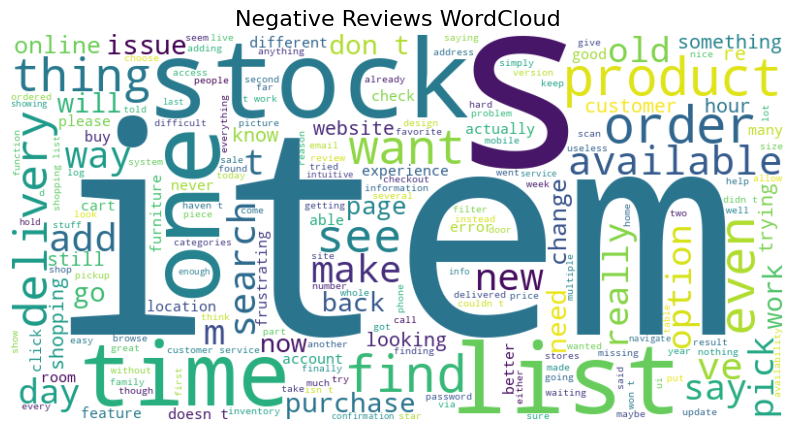

In [4]:
# CODE 수정 #

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 파일 읽기
google_reviews = pd.read_csv("google_reviews.csv")
apple_reviews = pd.read_csv("apple_reviews.csv")

# 데이터 결합
data = pd.concat([google_reviews, apple_reviews], ignore_index=True)

# 긍정과 부정 리뷰 분리
positive_reviews = data[data['sentiment'] == 'POSITIVE']['review']
negative_reviews = data[data['sentiment'] == 'NEGATIVE']['review']

# 텍스트 전처리 함수
custom_stopwords = ['app', 'ikea', 'use', 'using', 'used', 'apps', 'application', 'store']
def preprocess_text(text_series):
    return text_series.str.lower().str.replace(r"[^\w\s]", " ", regex=True).apply(lambda x: ' '.join([word for word in x.split() if word not in custom_stopwords]))

positive_reviews = preprocess_text(positive_reviews)
negative_reviews = preprocess_text(negative_reviews)

# 키워드 추출 함수
def extract_keywords(reviews, top_n=20):
    vectorizer = CountVectorizer(stop_words='english', max_features=top_n)
    X = vectorizer.fit_transform(reviews.dropna())
    keywords = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)
    return pd.DataFrame({'keyword': keywords, 'count': counts}).sort_values(by='count', ascending=False)

# 카테고리별 문제 분류 함수
def categorize_issues(text_series):
    categories = {
        'search': ['search', 'find', 'filter', 'results'],
        'navigation': ['navigate', 'menu', 'layout', 'confusing'],
        'performance': ['slow', 'crash', 'bug', 'error'],
        'checkout': ['checkout', 'payment', 'cart', 'order']
    }
    issue_counts = {category: 0 for category in categories.keys()}

    for review in text_series.dropna():
        for category, keywords in categories.items():
            if any(keyword in review for keyword in keywords):
                issue_counts[category] += 1

    return pd.DataFrame(list(issue_counts.items()), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

# 감성 점수 및 리뷰 길이 분석 함수
def analyze_sentiment_length(reviews):
    reviews = reviews.dropna()
    review_lengths = reviews.apply(len)
    avg_length = review_lengths.mean()
    return avg_length, review_lengths

# 긍정과 부정 키워드 추출
positive_keywords = extract_keywords(positive_reviews)
negative_keywords = extract_keywords(negative_reviews)

# 부정적 리뷰 카테고리 분석
negative_issues = categorize_issues(negative_reviews)

# 리뷰 길이 분석
positive_avg_length, positive_lengths = analyze_sentiment_length(positive_reviews)
negative_avg_length, negative_lengths = analyze_sentiment_length(negative_reviews)

# 분석 결과 출력
print("Average Positive Review Length:", positive_avg_length)
print("Average Negative Review Length:", negative_avg_length)
print("Negative Review Issues by Category:\n", negative_issues)

# 키워드 시각화 함수
def plot_keywords(keyword_df, title):
    plt.figure(figsize=(10, 6))
    plt.bar(keyword_df['keyword'], keyword_df['count'])
    plt.title(title)
    plt.xlabel('Keywords')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# 카테고리 문제 시각화 함수
def plot_issues(issue_df, title):
    plt.figure(figsize=(10, 6))
    plt.bar(issue_df['Category'], issue_df['Count'])
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# 긍정 리뷰 키워드 시각화
plot_keywords(positive_keywords, "Top Positive Keywords")

# 부정 리뷰 키워드 시각화
plot_keywords(negative_keywords, "Top Negative Keywords")

# 부정적 리뷰 카테고리 시각화
plot_issues(negative_issues, "Negative Review Issues by Category")

# 워드클라우드 생성 함수
def create_wordcloud(text_series, title):
    text = " ".join(text_series.dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# 긍정 리뷰 워드클라우드
create_wordcloud(positive_reviews, "Positive Reviews WordCloud")

# 부정 리뷰 워드클라우드
create_wordcloud(negative_reviews, "Negative Reviews WordCloud")


In [5]:
# About Data #

# 작성 날짜가 포함되어 있는지 확인
if 'date' in google_reviews.columns and 'date' in apple_reviews.columns:
    # 날짜 열을 datetime 형식으로 변환
    google_reviews['date'] = pd.to_datetime(google_reviews['date'])
    apple_reviews['date'] = pd.to_datetime(apple_reviews['date'])

    # 리뷰 기간 확인
    google_start_date = google_reviews['date'].min()
    google_end_date = google_reviews['date'].max()
    apple_start_date = apple_reviews['date'].min()
    apple_end_date = apple_reviews['date'].max()

    print(f"Google Reviews Period: {google_start_date} to {google_end_date}")
    print(f"Apple Reviews Period: {apple_start_date} to {apple_end_date}")
else:
    print("Date information is not available in the datasets.")


Date information is not available in the datasets.


Review Data Period: 2020-11-23 22:24:09 to 2024-12-18 19:49:42
Average Positive Review Length: 264.4786324786325
Average Negative Review Length: 599.5322580645161
Negative Review Issues by Category:
       Category  Count
3     checkout     26
0       search     19
2  performance     14
1   navigation      4


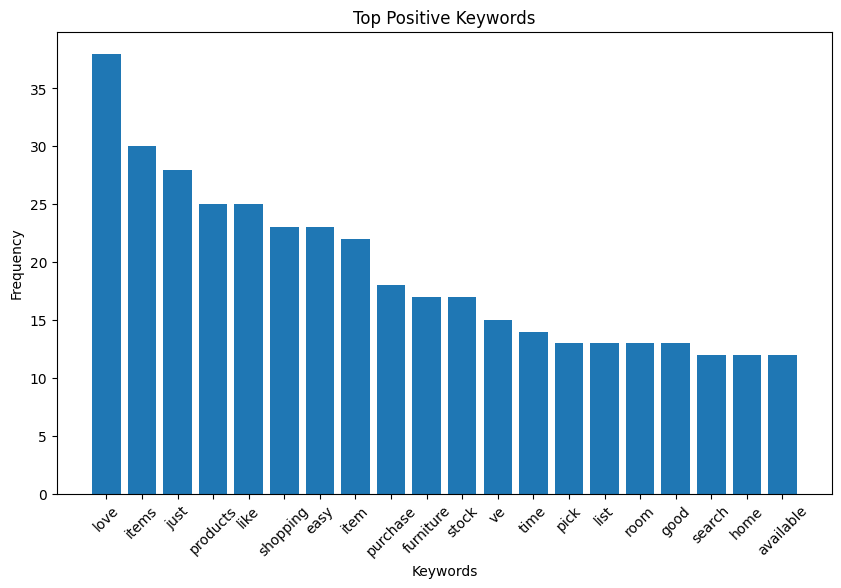

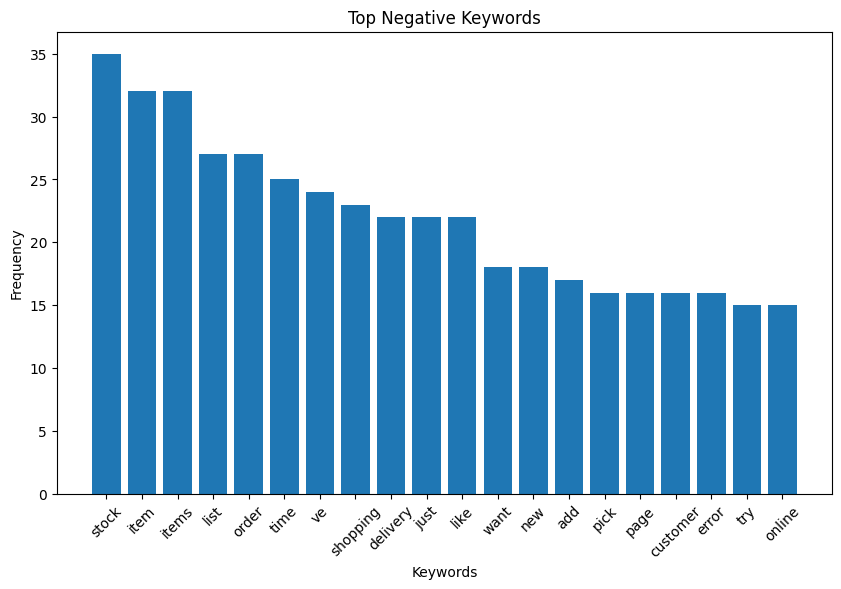

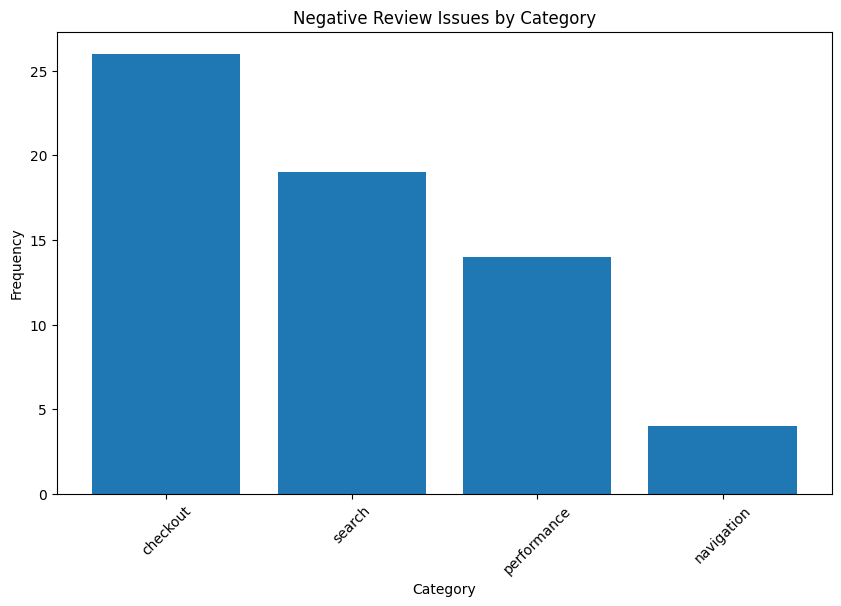

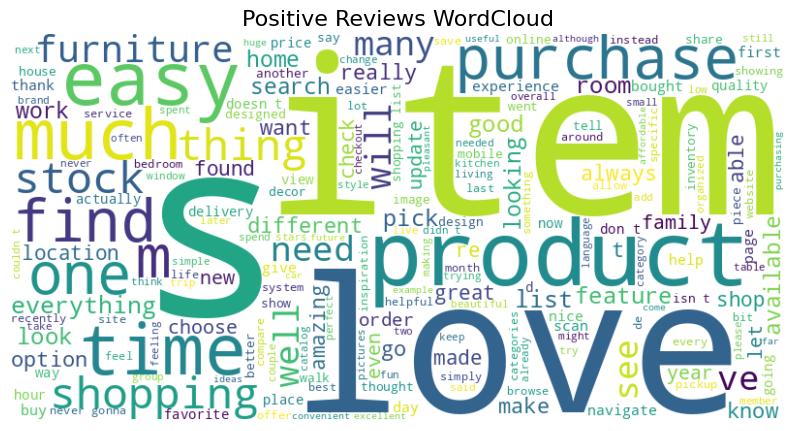

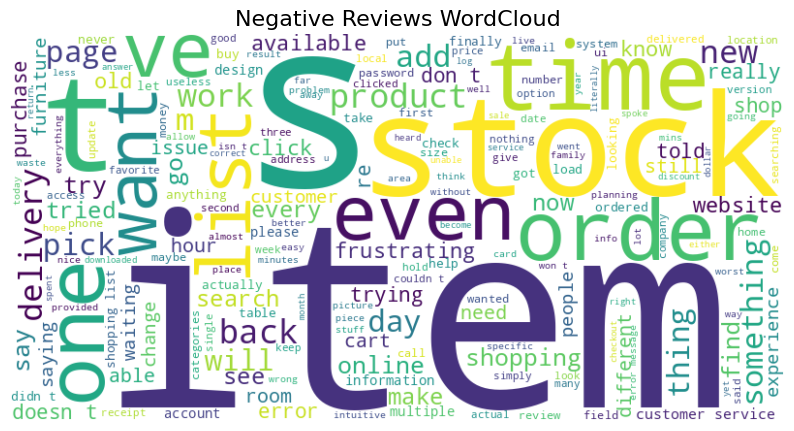

In [7]:
# Data Information 추가
# Language = English (AppStore)
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from google_play_scraper import reviews, Sort
from app_store_scraper import AppStore

# 리뷰 데이터 수집 함수

def fetch_google_reviews_with_date(app_id, lang='en', country='us', num_reviews=100):
    result, _ = reviews(
        app_id,
        lang=lang,
        country=country,
        count=num_reviews,
        sort=Sort.NEWEST
    )
    return pd.DataFrame([{
        "review": r["content"],
        "score": r["score"],
        "date": r["at"]  # 작성 날짜 포함
    } for r in result])

def fetch_apple_reviews_with_date(app_name, country='us', num_reviews=100):
    app = AppStore(country=country, app_name=app_name)
    app.review(how_many=num_reviews)
    return pd.DataFrame([{
        "review": r["review"],
        "score": r["rating"],
        "date": r["date"]  # 작성 날짜 포함
    } for r in app.reviews])

# 리뷰 데이터 로드 또는 수집
google_reviews = fetch_google_reviews_with_date("com.ingka.ikea.app")
apple_reviews = fetch_apple_reviews_with_date("ikea")

# 데이터 결합
data = pd.concat([google_reviews, apple_reviews], ignore_index=True)

# 날짜 형식 변환
data['date'] = pd.to_datetime(data['date'])
start_date = data['date'].min()
end_date = data['date'].max()

print(f"Review Data Period: {start_date} to {end_date}")

# 긍정과 부정 리뷰 분리
positive_reviews = data[data['score'] >= 4]['review']
negative_reviews = data[data['score'] <= 2]['review']

# 텍스트 전처리 함수
custom_stopwords = ['app', 'ikea', 'use', 'using', 'used', 'apps', 'application', 'store']
def preprocess_text(text_series):
    return text_series.str.lower().str.replace(r"[^\w\s]", " ", regex=True).apply(lambda x: ' '.join([word for word in x.split() if word not in custom_stopwords]))

positive_reviews = preprocess_text(positive_reviews)
negative_reviews = preprocess_text(negative_reviews)

# 키워드 추출 함수
def extract_keywords(reviews, top_n=20):
    vectorizer = CountVectorizer(stop_words='english', max_features=top_n)
    X = vectorizer.fit_transform(reviews.dropna())
    keywords = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)
    return pd.DataFrame({'keyword': keywords, 'count': counts}).sort_values(by='count', ascending=False)

# 카테고리별 문제 분류 함수
def categorize_issues(text_series):
    categories = {
        'search': ['search', 'find', 'filter', 'results'],
        'navigation': ['navigate', 'menu', 'layout', 'confusing'],
        'performance': ['slow', 'crash', 'bug', 'error'],
        'checkout': ['checkout', 'payment', 'cart', 'order']
    }
    issue_counts = {category: 0 for category in categories.keys()}

    for review in text_series.dropna():
        for category, keywords in categories.items():
            if any(keyword in review for keyword in keywords):
                issue_counts[category] += 1

    return pd.DataFrame(list(issue_counts.items()), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

# 감성 점수 및 리뷰 길이 분석 함수
def analyze_sentiment_length(reviews):
    reviews = reviews.dropna()
    review_lengths = reviews.apply(len)
    avg_length = review_lengths.mean()
    return avg_length, review_lengths

# 긍정과 부정 키워드 추출
positive_keywords = extract_keywords(positive_reviews)
negative_keywords = extract_keywords(negative_reviews)

# 부정적 리뷰 카테고리 분석
negative_issues = categorize_issues(negative_reviews)

# 리뷰 길이 분석
positive_avg_length, positive_lengths = analyze_sentiment_length(positive_reviews)
negative_avg_length, negative_lengths = analyze_sentiment_length(negative_reviews)

# 분석 결과 출력
print("Average Positive Review Length:", positive_avg_length)
print("Average Negative Review Length:", negative_avg_length)
print("Negative Review Issues by Category:\n", negative_issues)

# 키워드 시각화 함수
def plot_keywords(keyword_df, title):
    plt.figure(figsize=(10, 6))
    plt.bar(keyword_df['keyword'], keyword_df['count'])
    plt.title(title)
    plt.xlabel('Keywords')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# 카테고리 문제 시각화 함수
def plot_issues(issue_df, title):
    plt.figure(figsize=(10, 6))
    plt.bar(issue_df['Category'], issue_df['Count'])
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# 긍정 리뷰 키워드 시각화
plot_keywords(positive_keywords, "Top Positive Keywords")

# 부정 리뷰 키워드 시각화
plot_keywords(negative_keywords, "Top Negative Keywords")

# 부정적 리뷰 카테고리 시각화
plot_issues(negative_issues, "Negative Review Issues by Category")

# 워드클라우드 생성 함수
def create_wordcloud(text_series, title):
    text = " ".join(text_series.dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# 긍정 리뷰 워드클라우드
create_wordcloud(positive_reviews, "Positive Reviews WordCloud")

# 부정 리뷰 워드클라우드
create_wordcloud(negative_reviews, "Negative Reviews WordCloud")


In [8]:
# KOREAN + ENGLISH

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from google_play_scraper import reviews, Sort
from app_store_scraper import AppStore
from konlpy.tag import Okt

# 리뷰 데이터 수집 함수

def fetch_google_reviews_with_date(app_id, lang='en', country='us', num_reviews=100):
    result, _ = reviews(
        app_id,
        lang=lang,
        country=country,
        count=num_reviews,
        sort=Sort.NEWEST
    )
    return pd.DataFrame([{
        "review": r["content"],
        "score": r["score"],
        "date": r["at"]  # 작성 날짜 포함
    } for r in result])

def fetch_apple_reviews_with_date(app_name, country='us', num_reviews=100):
    app = AppStore(country=country, app_name=app_name)
    app.review(how_many=num_reviews)
    return pd.DataFrame([{
        "review": r["review"],
        "score": r["rating"],
        "date": r["date"]  # 작성 날짜 포함
    } for r in app.reviews])

# 리뷰 데이터 로드 또는 수집
google_reviews = fetch_google_reviews_with_date("com.ingka.ikea.app", lang='ko', country='kr')
apple_reviews = fetch_apple_reviews_with_date("ikea", country='kr')

# 데이터 결합
data = pd.concat([google_reviews, apple_reviews], ignore_index=True)

# 날짜 형식 변환
data['date'] = pd.to_datetime(data['date'])
start_date = data['date'].min()
end_date = data['date'].max()

print(f"Review Data Period: {start_date} to {end_date}")

# 긍정과 부정 리뷰 분리
positive_reviews = data[data['score'] >= 4]['review']
negative_reviews = data[data['score'] <= 2]['review']

# 한국어 텍스트 전처리 함수
okt = Okt()
custom_stopwords_ko = ['사용', '앱', '있다', '없는', '때문', '하지만', '제품', '어플']
def preprocess_text_ko(text_series):
    return text_series.apply(lambda x: ' '.join(
        [word for word in okt.morphs(x, stem=True) if word not in custom_stopwords_ko]
    ))

positive_reviews = preprocess_text_ko(positive_reviews)
negative_reviews = preprocess_text_ko(negative_reviews)

# 키워드 추출 함수
def extract_keywords(reviews, top_n=20):
    vectorizer = CountVectorizer(max_features=top_n)
    X = vectorizer.fit_transform(reviews.dropna())
    keywords = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)
    return pd.DataFrame({'keyword': keywords, 'count': counts}).sort_values(by='count', ascending=False)

# 카테고리별 문제 분류 함수
def categorize_issues(text_series):
    categories = {
        'search': ['검색', '찾다', '필터', '결과'],
        'navigation': ['이동', '메뉴', '레이아웃', '혼란'],
        'performance': ['느리다', '충돌', '버그', '오류'],
        'checkout': ['결제', '장바구니', '주문']
    }
    issue_counts = {category: 0 for category in categories.keys()}

    for review in text_series.dropna():
        for category, keywords in categories.items():
            if any(keyword in review for keyword in keywords):
                issue_counts[category] += 1

    return pd.DataFrame(list(issue_counts.items()), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

# 감성 점수 및 리뷰 길이 분석 함수
def analyze_sentiment_length(reviews):
    reviews = reviews.dropna()
    review_lengths = reviews.apply(len)
    avg_length = review_lengths.mean()
    return avg_length, review_lengths

# 긍정과 부정 키워드 추출
positive_keywords = extract_keywords(positive_reviews)
negative_keywords = extract_keywords(negative_reviews)

# 부정적 리뷰 카테고리 분석
negative_issues = categorize_issues(negative_reviews)

# 리뷰 길이 분석
positive_avg_length, positive_lengths = analyze_sentiment_length(positive_reviews)
negative_avg_length, negative_lengths = analyze_sentiment_length(negative_reviews)

# 분석 결과 출력
print("Average Positive Review Length:", positive_avg_length)
print("Average Negative Review Length:", negative_avg_length)
print("Negative Review Issues by Category:\n", negative_issues)

# 키워드 시각화 함수
def plot_keywords(keyword_df, title):
    plt.figure(figsize=(10, 6))
    plt.bar(keyword_df['keyword'], keyword_df['count'])
    plt.title(title)
    plt.xlabel('Keywords')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# 카테고리 문제 시각화 함수
def plot_issues(issue_df, title):
    plt.figure(figsize=(10, 6))
    plt.bar(issue_df['Category'], issue_df['Count'])
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# 긍정 리뷰 키워드 시각화
plot_keywords(positive_keywords, "Top Positive Keywords")

# 부정 리뷰 키워드 시각화
plot_keywords(negative_keywords, "Top Negative Keywords")

# 부정적 리뷰 카테고리 시각화
plot_issues(negative_issues, "Negative Review Issues by Category")

# 워드클라우드 생성 함수
def create_wordcloud(text_series, title):
    text = " ".join(text_series.dropna())
    wordcloud = WordCloud(font_path='malgun.ttf', width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# 긍정 리뷰 워드클라우드
create_wordcloud(positive_reviews, "Positive Reviews WordCloud")

# 부정 리뷰 워드클라우드
create_wordcloud(negative_reviews, "Negative Reviews WordCloud")


ModuleNotFoundError: No module named 'konlpy'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Review Data Period: 2020-12-15 15:18:56 to 2024-12-18 06:47:19
Average Positive Review Length: 42.29577464788732
Average Negative Review Length: 157.75757575757575
Negative Review Issues by Category:
       Category  Count
3     checkout     10
2  performance      8
0       search      2
1   navigation      2


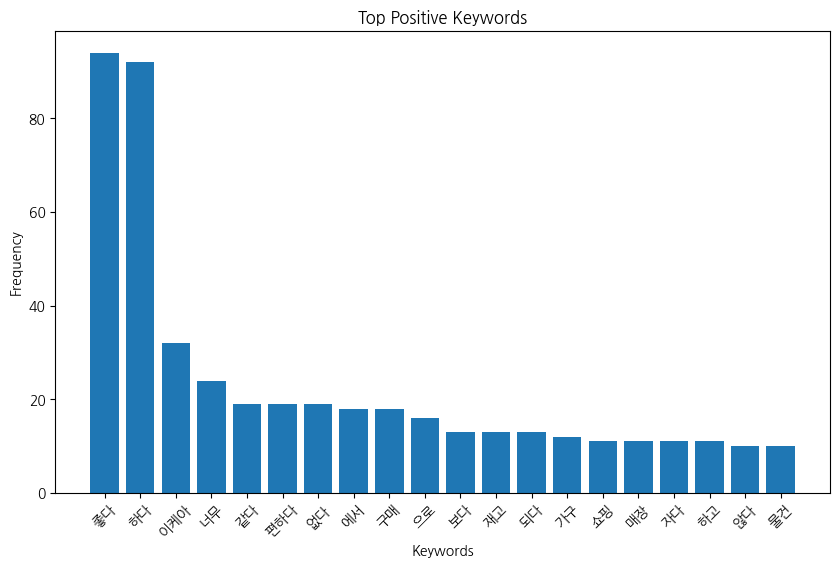

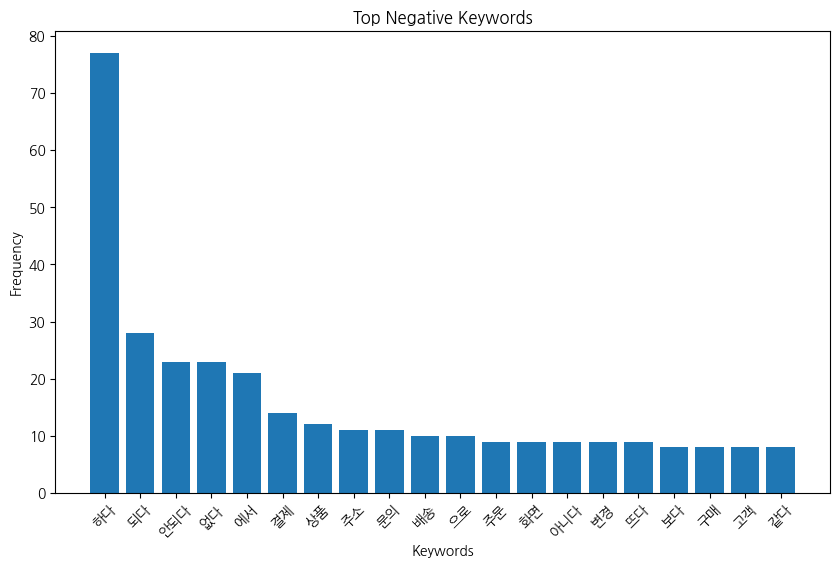

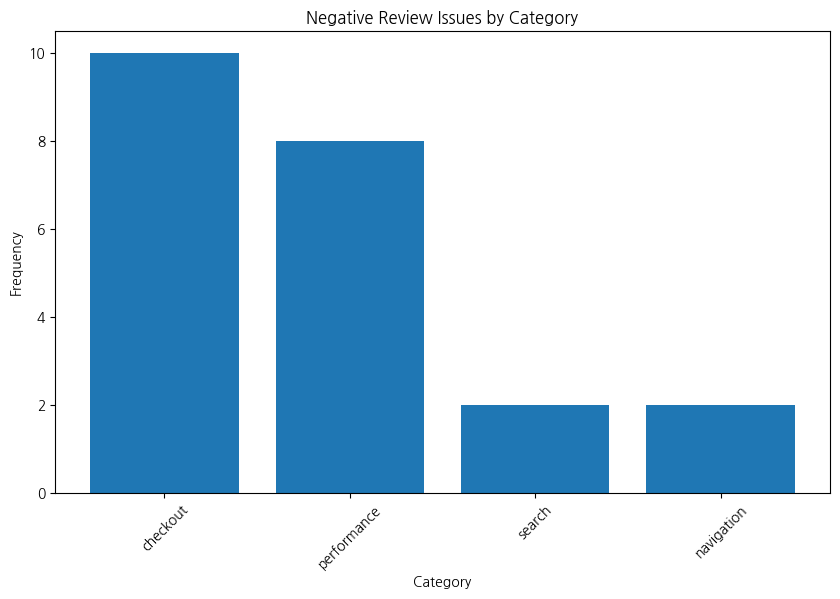

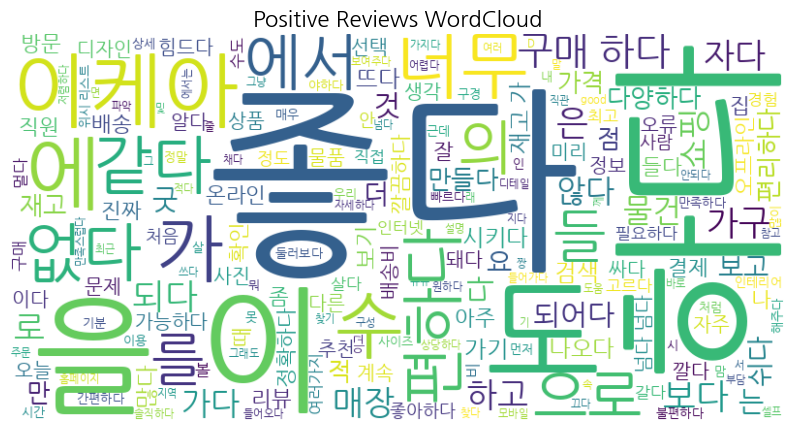

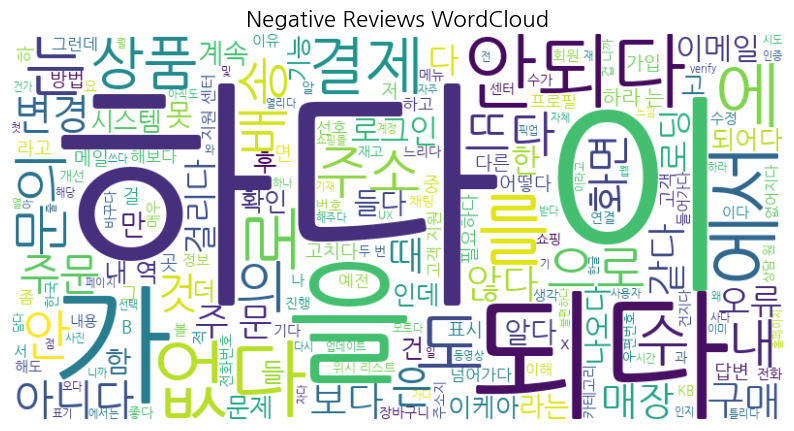

In [11]:
# KOREAN App REVIEW 재실행

# konlpy 및 관련 패키지 설치
!pip install konlpy
!apt-get install -y fonts-nanum

# 한국어 폰트 설정
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='NanumGothic')

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from google_play_scraper import reviews, Sort
from app_store_scraper import AppStore
from konlpy.tag import Okt

# 리뷰 데이터 수집 함수

def fetch_google_reviews_with_date(app_id, lang='en', country='us', num_reviews=100):
    result, _ = reviews(
        app_id,
        lang=lang,
        country=country,
        count=num_reviews,
        sort=Sort.NEWEST
    )
    return pd.DataFrame([{
        "review": r["content"],
        "score": r["score"],
        "date": r["at"]  # 작성 날짜 포함
    } for r in result])

def fetch_apple_reviews_with_date(app_name, country='us', num_reviews=100):
    app = AppStore(country=country, app_name=app_name)
    app.review(how_many=num_reviews)
    return pd.DataFrame([{
        "review": r["review"],
        "score": r["rating"],
        "date": r["date"]  # 작성 날짜 포함
    } for r in app.reviews])

# 리뷰 데이터 로드 또는 수집
google_reviews = fetch_google_reviews_with_date("com.ingka.ikea.app", lang='ko', country='kr')
apple_reviews = fetch_apple_reviews_with_date("ikea", country='kr')

# 데이터 결합
data = pd.concat([google_reviews, apple_reviews], ignore_index=True)

# 날짜 형식 변환
data['date'] = pd.to_datetime(data['date'])
start_date = data['date'].min()
end_date = data['date'].max()

print(f"Review Data Period: {start_date} to {end_date}")

# 긍정과 부정 리뷰 분리
positive_reviews = data[data['score'] >= 4]['review']
negative_reviews = data[data['score'] <= 2]['review']

# 한국어 텍스트 전처리 함수
okt = Okt()
custom_stopwords_ko = ['사용', '앱', '있다', '없는', '때문', '하지만', '제품', '어플']
def preprocess_text_ko(text_series):
    return text_series.apply(lambda x: ' '.join(
        [word for word in okt.morphs(x, stem=True) if word not in custom_stopwords_ko]
    ))

positive_reviews = preprocess_text_ko(positive_reviews)
negative_reviews = preprocess_text_ko(negative_reviews)

# 키워드 추출 함수
def extract_keywords(reviews, top_n=20):
    vectorizer = CountVectorizer(max_features=top_n)
    X = vectorizer.fit_transform(reviews.dropna())
    keywords = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)
    return pd.DataFrame({'keyword': keywords, 'count': counts}).sort_values(by='count', ascending=False)

# 카테고리별 문제 분류 함수
def categorize_issues(text_series):
    categories = {
        'search': ['검색', '찾다', '필터', '결과'],
        'navigation': ['이동', '메뉴', '레이아웃', '혼란'],
        'performance': ['느리다', '충돌', '버그', '오류'],
        'checkout': ['결제', '장바구니', '주문']
    }
    issue_counts = {category: 0 for category in categories.keys()}

    for review in text_series.dropna():
        for category, keywords in categories.items():
            if any(keyword in review for keyword in keywords):
                issue_counts[category] += 1

    return pd.DataFrame(list(issue_counts.items()), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

# 감성 점수 및 리뷰 길이 분석 함수
def analyze_sentiment_length(reviews):
    reviews = reviews.dropna()
    review_lengths = reviews.apply(len)
    avg_length = review_lengths.mean()
    return avg_length, review_lengths

# 긍정과 부정 키워드 추출
positive_keywords = extract_keywords(positive_reviews)
negative_keywords = extract_keywords(negative_reviews)

# 부정적 리뷰 카테고리 분석
negative_issues = categorize_issues(negative_reviews)

# 리뷰 길이 분석
positive_avg_length, positive_lengths = analyze_sentiment_length(positive_reviews)
negative_avg_length, negative_lengths = analyze_sentiment_length(negative_reviews)

# 분석 결과 출력
print("Average Positive Review Length:", positive_avg_length)
print("Average Negative Review Length:", negative_avg_length)
print("Negative Review Issues by Category:\n", negative_issues)

# 키워드 시각화 함수
def plot_keywords(keyword_df, title):
    plt.figure(figsize=(10, 6))
    plt.bar(keyword_df['keyword'], keyword_df['count'])
    plt.title(title)
    plt.xlabel('Keywords')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# 카테고리 문제 시각화 함수
def plot_issues(issue_df, title):
    plt.figure(figsize=(10, 6))
    plt.bar(issue_df['Category'], issue_df['Count'])
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# 긍정 리뷰 키워드 시각화
plot_keywords(positive_keywords, "Top Positive Keywords")

# 부정 리뷰 키워드 시각화
plot_keywords(negative_keywords, "Top Negative Keywords")

# 부정적 리뷰 카테고리 시각화
plot_issues(negative_issues, "Negative Review Issues by Category")

# 워드클라우드 생성 함수
def create_wordcloud(text_series, title):
    text = " ".join(text_series.dropna())
    wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# 긍정 리뷰 워드클라우드
create_wordcloud(positive_reviews, "Positive Reviews WordCloud")

# 부정 리뷰 워드클라우드
create_wordcloud(negative_reviews, "Negative Reviews WordCloud")


In [10]:
# Font 문제

# konlpy 및 관련 패키지 설치
!pip install konlpy
!apt-get install -y fonts-nanum

# 나눔고딕 폰트 설정 및 캐시 갱신
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import os

# 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
if os.path.exists(font_path):
    font_manager.fontManager.addfont(font_path)
    rc('font', family='NanumGothic')
else:
    print("Font path not found. Check installation.")

# 캐시 갱신
plt.rcParams['axes.unicode_minus'] = False


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [12]:
# 데이터의 개수

# Fetch reviews in English
english_reviews_google = fetch_google_reviews_with_date("com.ingka.ikea.app", lang='en', country='us', num_reviews=100)
english_reviews_apple = fetch_apple_reviews_with_date("ikea", country='us', num_reviews=100)

# Fetch reviews in Korean
korean_reviews_google = fetch_google_reviews_with_date("com.ingka.ikea.app", lang='ko', country='kr', num_reviews=100)
korean_reviews_apple = fetch_apple_reviews_with_date("ikea", country='kr', num_reviews=100)

# Count the number of reviews
english_review_count = len(english_reviews_google) + len(english_reviews_apple)
korean_review_count = len(korean_reviews_google) + len(korean_reviews_apple)

print(f"English Reviews Count: {english_review_count}")
print(f"Korean Reviews Count: {korean_review_count}")


English Reviews Count: 200
Korean Reviews Count: 200


# IKEA App ReDesign을 위한 Customer Review Analysis
## 1. 영어 리뷰 + 한국어 리뷰

In [13]:
# 영어 리뷰 데이터 수집
english_google_reviews = fetch_google_reviews_with_date("com.ingka.ikea.app", lang='en', country='us', num_reviews=100)
english_apple_reviews = fetch_apple_reviews_with_date("ikea", country='us', num_reviews=100)

english_reviews = pd.concat([english_google_reviews, english_apple_reviews], ignore_index=True)

# 언어 구분 추가
english_reviews['language'] = 'English'
data['language'] = 'Korean'

# 통합 데이터
all_reviews = pd.concat([data, english_reviews], ignore_index=True)


## 2. 언어별 데이터 비교

### 2.1 리뷰 개수

In [14]:
print("English Reviews Count:", len(english_reviews))
print("Korean Reviews Count:", len(data))

English Reviews Count: 200
Korean Reviews Count: 200


### 2.2 언어별 평균 리뷰 길이

In [15]:
avg_length_by_language = all_reviews.groupby('language')['review'].apply(lambda x: x.str.len().mean())
print(avg_length_by_language)

language
English    432.230
Korean      62.295
Name: review, dtype: float64


## 3. 카테고리별 문제 비교

In [16]:
korean_issues = categorize_issues(negative_reviews)
english_issues = categorize_issues(english_reviews[english_reviews['score'] <= 2]['review'])

print("Korean Issues:\n", korean_issues)
print("English Issues:\n", english_issues)

Korean Issues:
       Category  Count
3     checkout     10
2  performance      8
0       search      2
1   navigation      2
English Issues:
       Category  Count
0       search      0
1   navigation      0
2  performance      0
3     checkout      0


## 4. 시각화

### 4.1 언어별 키워드 비교

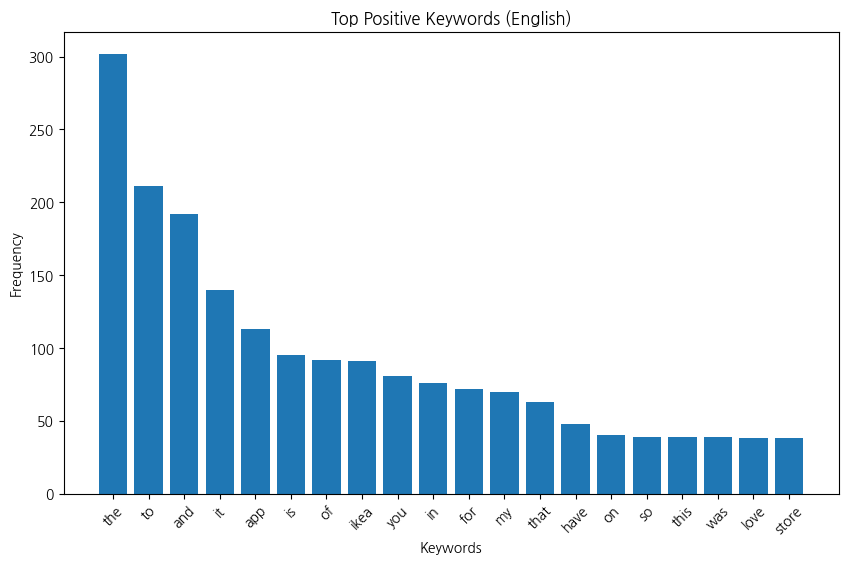

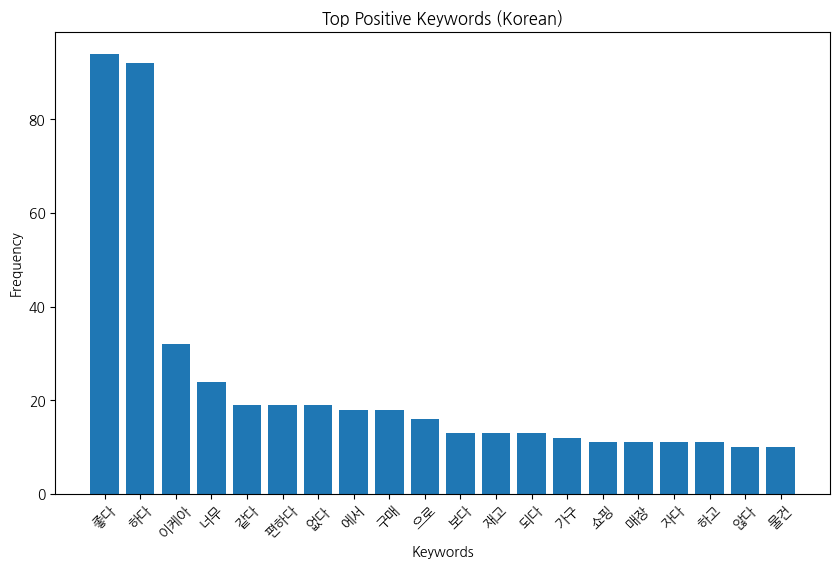

In [17]:
english_positive_keywords = extract_keywords(english_reviews[english_reviews['score'] >= 4]['review'])
plot_keywords(english_positive_keywords, "Top Positive Keywords (English)")
plot_keywords(positive_keywords, "Top Positive Keywords (Korean)")

### 4.2 언어별 워드 클라우드

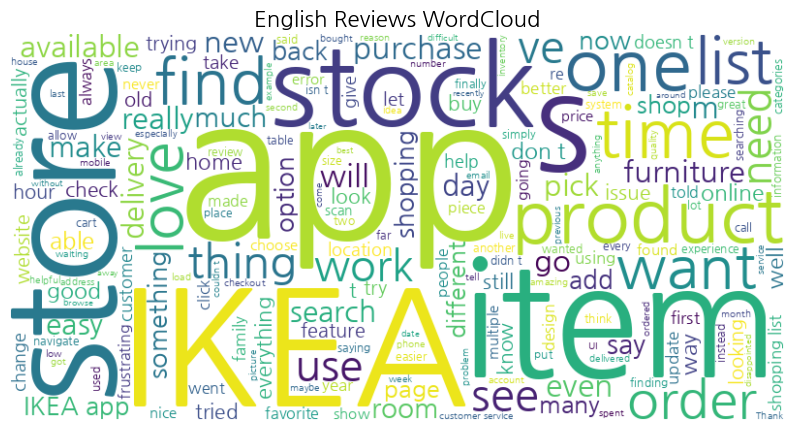

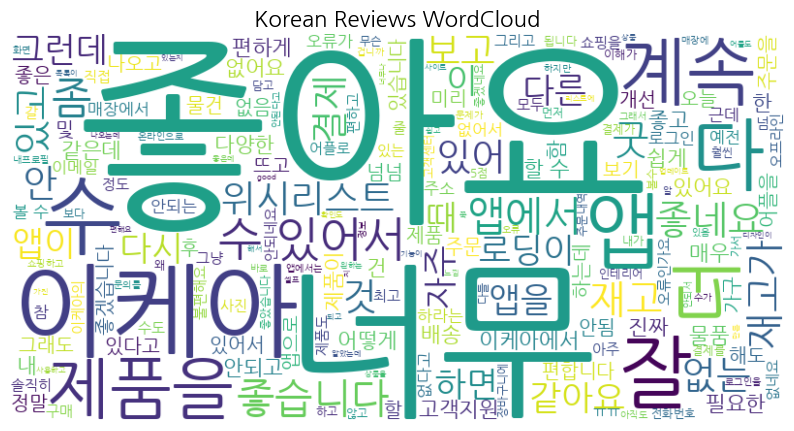

In [18]:
create_wordcloud(english_reviews['review'], "English Reviews WordCloud")
create_wordcloud(data['review'], "Korean Reviews WordCloud")

#5. 추가 분석

### 5.1 언어별 리뷰 개수 확인

In [19]:
# 언어별 리뷰 개수 확인
english_positive_reviews = english_reviews[english_reviews['score'] >= 4]
english_negative_reviews = english_reviews[english_reviews['score'] <= 2]

print("Korean Positive Reviews Count:", len(positive_reviews))
print("Korean Negative Reviews Count:", len(negative_reviews))
print("English Positive Reviews Count:", len(english_positive_reviews))
print("English Negative Reviews Count:", len(english_negative_reviews))


Korean Positive Reviews Count: 142
Korean Negative Reviews Count: 33
English Positive Reviews Count: 117
English Negative Reviews Count: 62


# 영어 / 한국어 리뷰 분석

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Korean Positive Review Length (Avg): 42.29577464788732
Korean Negative Review Length (Avg): 157.75757575757575
English Positive Review Length (Avg): 283.2564102564103
English Negative Review Length (Avg): 636.241935483871
Korean Negative Review Issues by Category:
       Category  Count
3     checkout     10
2  performance      8
0       search      2
1   navigation      2
English Negative Review Issues by Category:
       Category  Count
3     checkout     26
2  performance     14
0       search      9
1   navigation      4


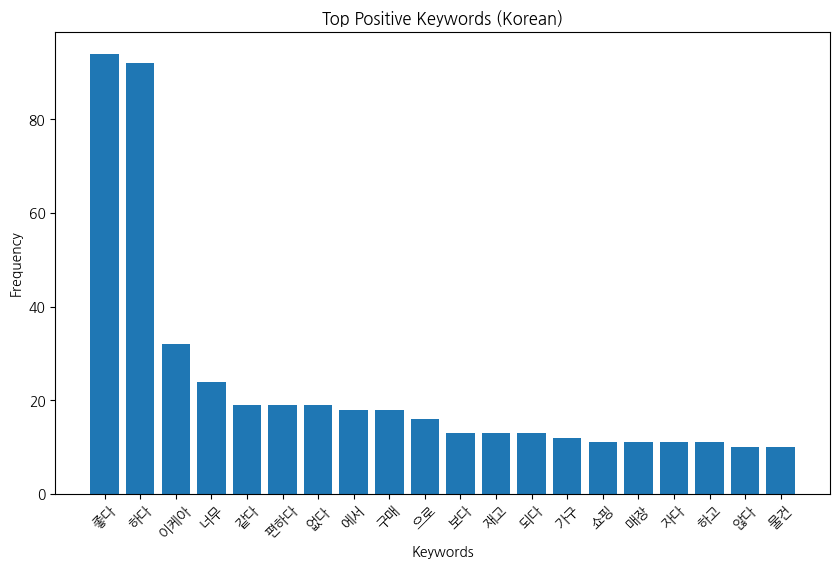

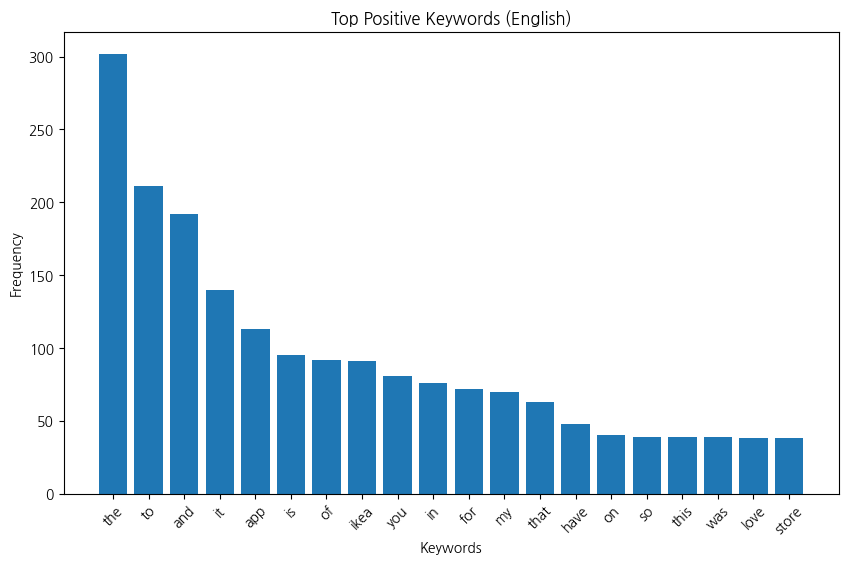

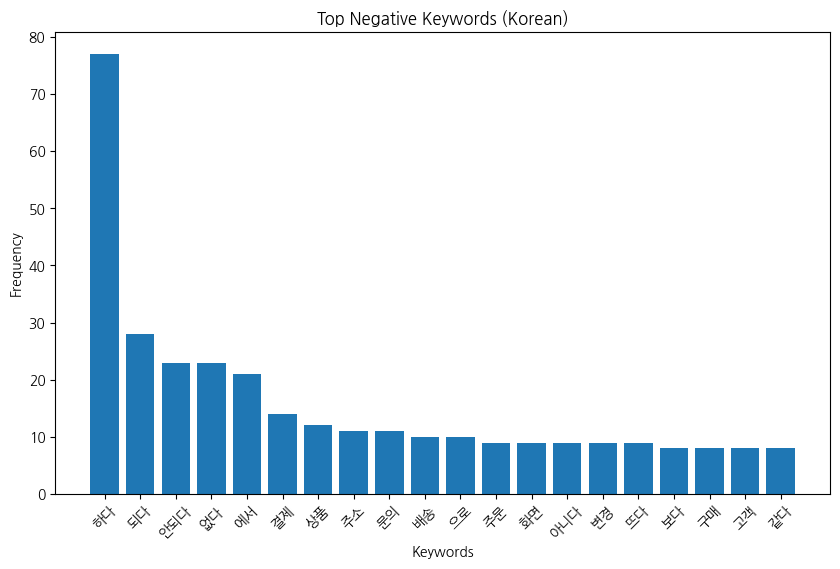

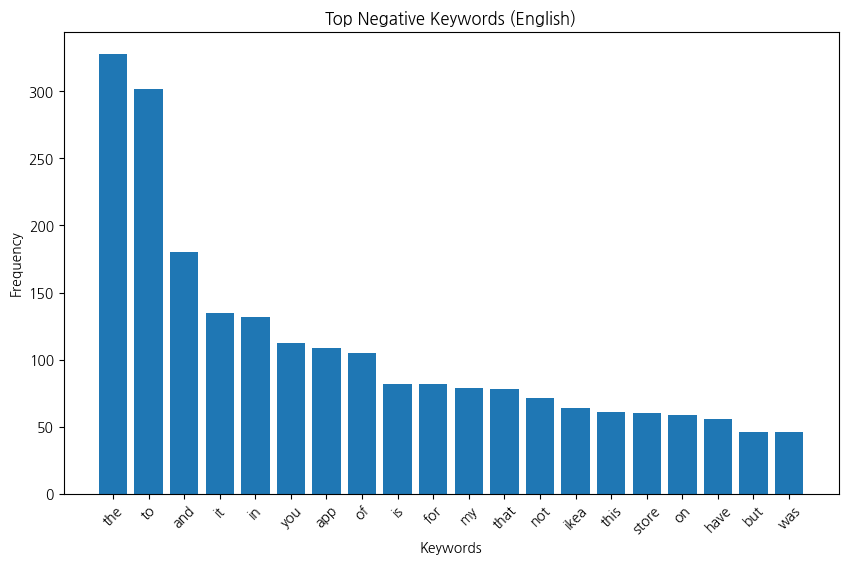

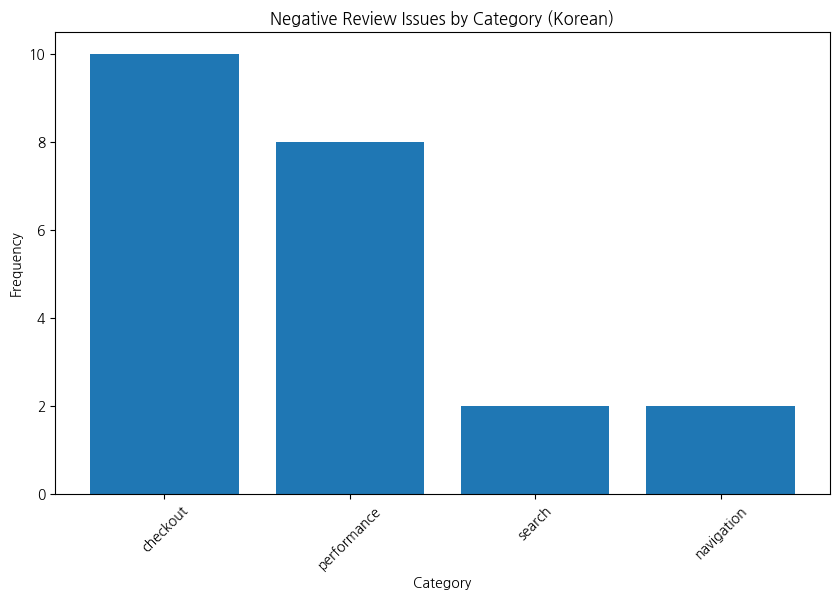

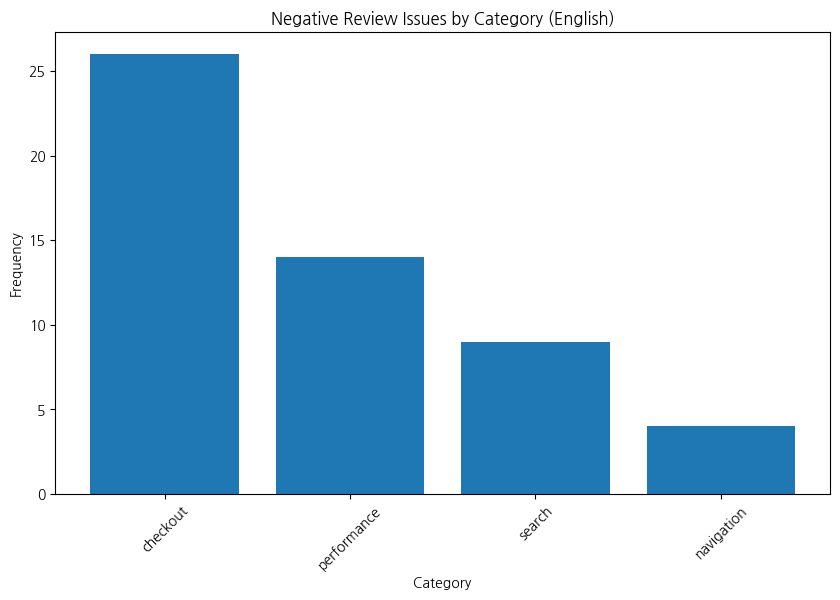

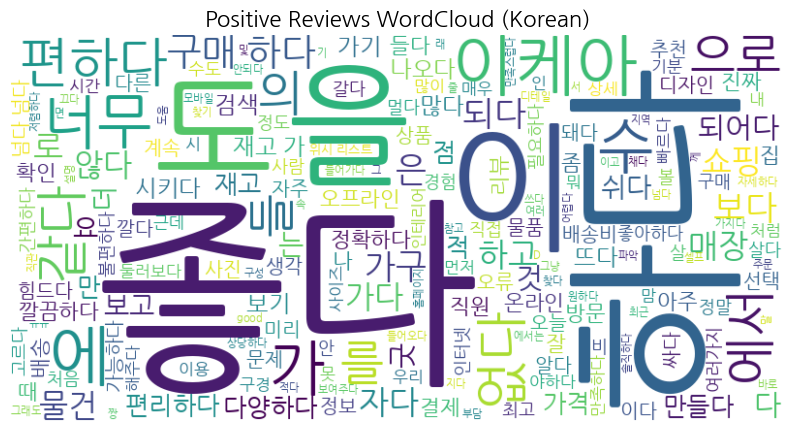

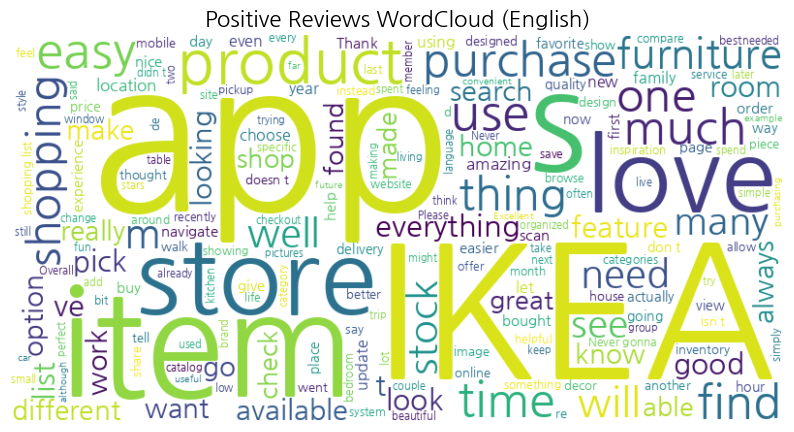

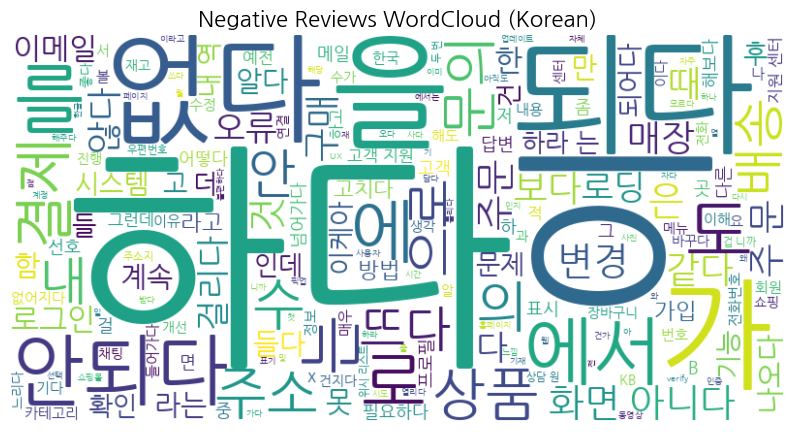

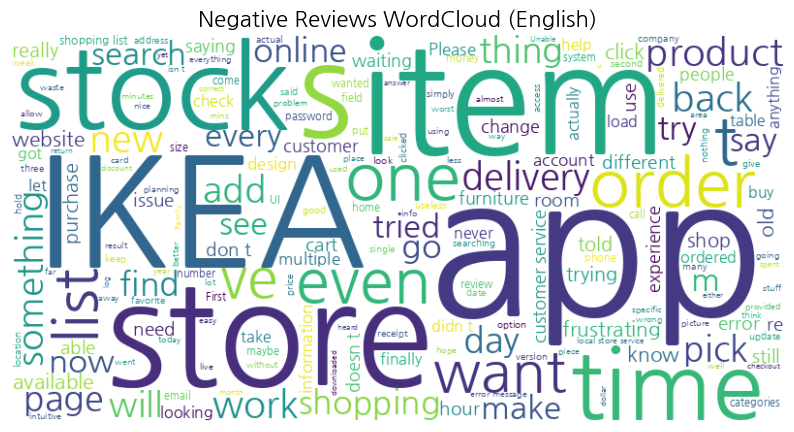

In [20]:
# konlpy 및 관련 패키지 설치
!pip install konlpy
!apt-get install -y fonts-nanum

# 한국어 폰트 설정
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='NanumGothic')

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from google_play_scraper import reviews, Sort
from app_store_scraper import AppStore
from konlpy.tag import Okt

# 리뷰 데이터 수집 함수

def fetch_google_reviews_with_date(app_id, lang='en', country='us', num_reviews=100):
    result, _ = reviews(
        app_id,
        lang=lang,
        country=country,
        count=num_reviews,
        sort=Sort.NEWEST
    )
    return pd.DataFrame([{
        "review": r["content"],
        "score": r["score"],
        "date": r["at"]  # 작성 날짜 포함
    } for r in result])

def fetch_apple_reviews_with_date(app_name, country='us', num_reviews=100):
    app = AppStore(country=country, app_name=app_name)
    app.review(how_many=num_reviews)
    return pd.DataFrame([{
        "review": r["review"],
        "score": r["rating"],
        "date": r["date"]  # 작성 날짜 포함
    } for r in app.reviews])

# 리뷰 데이터 로드 또는 수집
korean_google_reviews = fetch_google_reviews_with_date("com.ingka.ikea.app", lang='ko', country='kr')
korean_apple_reviews = fetch_apple_reviews_with_date("ikea", country='kr')
english_google_reviews = fetch_google_reviews_with_date("com.ingka.ikea.app", lang='en', country='us')
english_apple_reviews = fetch_apple_reviews_with_date("ikea", country='us')

# 데이터 결합
korean_reviews = pd.concat([korean_google_reviews, korean_apple_reviews], ignore_index=True)
english_reviews = pd.concat([english_google_reviews, english_apple_reviews], ignore_index=True)

# 날짜 형식 변환
korean_reviews['date'] = pd.to_datetime(korean_reviews['date'])
english_reviews['date'] = pd.to_datetime(english_reviews['date'])

# 긍정과 부정 리뷰 분리
def split_sentiments(data):
    positive = data[data['score'] >= 4]['review']
    negative = data[data['score'] <= 2]['review']
    return positive, negative

korean_positive_reviews, korean_negative_reviews = split_sentiments(korean_reviews)
english_positive_reviews, english_negative_reviews = split_sentiments(english_reviews)

# 한국어 텍스트 전처리 함수
okt = Okt()
custom_stopwords_ko = ['사용', '앱', '있다', '없는', '때문', '하지만', '제품', '어플']
def preprocess_text_ko(text_series):
    return text_series.apply(lambda x: ' '.join(
        [word for word in okt.morphs(x, stem=True) if word not in custom_stopwords_ko]
    ))

korean_positive_reviews = preprocess_text_ko(korean_positive_reviews)
korean_negative_reviews = preprocess_text_ko(korean_negative_reviews)

# 키워드 추출 함수
def extract_keywords(reviews, top_n=20):
    vectorizer = CountVectorizer(max_features=top_n)
    X = vectorizer.fit_transform(reviews.dropna())
    keywords = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)
    return pd.DataFrame({'keyword': keywords, 'count': counts}).sort_values(by='count', ascending=False)

# 카테고리별 문제 분류 함수
def categorize_issues(text_series, language):
    categories = {
        'search': ['검색', '찾다', '필터', '결과'] if language == 'ko' else ['search', 'filter', 'results'],
        'navigation': ['이동', '메뉴', '레이아웃', '혼란'] if language == 'ko' else ['navigate', 'menu', 'layout', 'confusing'],
        'performance': ['느리다', '충돌', '버그', '오류'] if language == 'ko' else ['slow', 'crash', 'bug', 'error'],
        'checkout': ['결제', '장바구니', '주문'] if language == 'ko' else ['checkout', 'payment', 'cart', 'order']
    }
    issue_counts = {category: 0 for category in categories.keys()}

    for review in text_series.dropna():
        for category, keywords in categories.items():
            if any(keyword in review for keyword in keywords):
                issue_counts[category] += 1

    return pd.DataFrame(list(issue_counts.items()), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

# 감성 점수 및 리뷰 길이 분석 함수
def analyze_sentiment_length(reviews):
    reviews = reviews.dropna()
    review_lengths = reviews.apply(len)
    avg_length = review_lengths.mean()
    return avg_length, review_lengths

# 긍정과 부정 키워드 추출
korean_positive_keywords = extract_keywords(korean_positive_reviews)
korean_negative_keywords = extract_keywords(korean_negative_reviews)
english_positive_keywords = extract_keywords(english_positive_reviews)
english_negative_keywords = extract_keywords(english_negative_reviews)

# 부정적 리뷰 카테고리 분석
korean_negative_issues = categorize_issues(korean_negative_reviews, 'ko')
english_negative_issues = categorize_issues(english_negative_reviews, 'en')

# 리뷰 길이 분석
korean_positive_avg_length, korean_positive_lengths = analyze_sentiment_length(korean_positive_reviews)
korean_negative_avg_length, korean_negative_lengths = analyze_sentiment_length(korean_negative_reviews)
english_positive_avg_length, english_positive_lengths = analyze_sentiment_length(english_positive_reviews)
english_negative_avg_length, english_negative_lengths = analyze_sentiment_length(english_negative_reviews)

# 분석 결과 출력
print("Korean Positive Review Length (Avg):", korean_positive_avg_length)
print("Korean Negative Review Length (Avg):", korean_negative_avg_length)
print("English Positive Review Length (Avg):", english_positive_avg_length)
print("English Negative Review Length (Avg):", english_negative_avg_length)
print("Korean Negative Review Issues by Category:\n", korean_negative_issues)
print("English Negative Review Issues by Category:\n", english_negative_issues)

# 키워드 시각화 함수
def plot_keywords(keyword_df, title):
    plt.figure(figsize=(10, 6))
    plt.bar(keyword_df['keyword'], keyword_df['count'])
    plt.title(title)
    plt.xlabel('Keywords')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# 카테고리 문제 시각화 함수
def plot_issues(issue_df, title):
    plt.figure(figsize=(10, 6))
    plt.bar(issue_df['Category'], issue_df['Count'])
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# 긍정 리뷰 키워드 시각화
plot_keywords(korean_positive_keywords, "Top Positive Keywords (Korean)")
plot_keywords(english_positive_keywords, "Top Positive Keywords (English)")

# 부정 리뷰 키워드 시각화
plot_keywords(korean_negative_keywords, "Top Negative Keywords (Korean)")
plot_keywords(english_negative_keywords, "Top Negative Keywords (English)")

# 부정적 리뷰 카테고리 시각화
plot_issues(korean_negative_issues, "Negative Review Issues by Category (Korean)")
plot_issues(english_negative_issues, "Negative Review Issues by Category (English)")

# 워드클라우드 생성 함수
def create_wordcloud(text_series, title):
    text = " ".join(text_series.dropna())
    wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# 워드클라우드 생성
create_wordcloud(korean_positive_reviews, "Positive Reviews WordCloud (Korean)")
create_wordcloud(english_positive_reviews, "Positive Reviews WordCloud (English)")
create_wordcloud(korean_negative_reviews, "Negative Reviews WordCloud (Korean)")
create_wordcloud(english_negative_reviews, "Negative Reviews WordCloud (English)")
